In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In these notes I want to go over some classic Monte Carlo sampling techniques.

### Rejection sampling

This is a really basic sampling technique. Here's how it goes. We want to sample from a target distribution $p(x)$ that might be hard. So we envelope it with another, easier-to-sample distribution $q(x)$, ie

$$ kq(x) \ge p(x) \text{   for all }x$$

In [36]:
def p(x):
    return 0.5*stats.norm.pdf(x,loc=30,scale=10) + 0.5*stats.norm.pdf(x,loc=80,scale=20)

def q(x):
    return stats.norm.pdf(x,loc=50,scale=30)

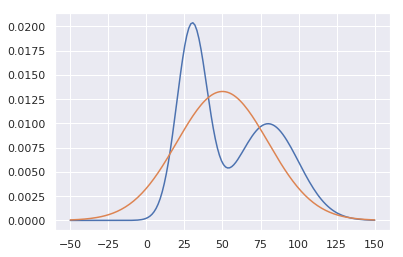

In [37]:
x = np.linspace(-50,150,150)
sns.set()
plt.plot(x,p(x))
plt.plot(x,q(x))
plt.show()

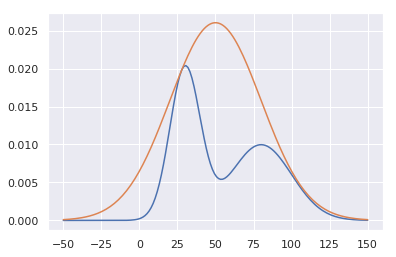

In [38]:
k = max(p(x)/q(x))
plt.plot(x,p(x))
plt.plot(x,k*q(x))
plt.show()

Now, rejection sampling works the same was as trying to figure out an integral geometrically via MC. We now sample from the distribution $x_1 \sim g(x)$ and a height $x_2 \sim \text{uniform}(0,kg(x_1))$.

We then **accept** the sample $x_1$ if $x_2 \le p(x_1)$ and **reject** otherwise.

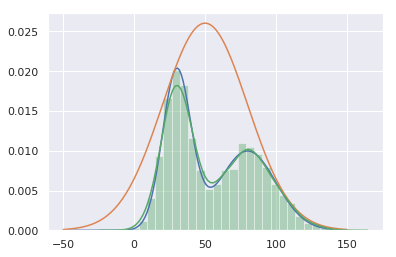

In [39]:
def rejection_sampling(p,q,k,num_samples=100):
    samples = []
    for _ in range(num_samples):
        # we have to sample from q easily, so we cheat and just sample
        # from the normal
        x1 = np.random.normal(50,30)
        x2 = np.random.uniform(0,k*q(x1))
        
        # accept/reject
        if x2 <= p(x1):
            samples.append(x1)
            
    return samples

samples = rejection_sampling(p,q,k,num_samples=10000)
samples = np.array(samples)
plt.plot(x,p(x))
plt.plot(x,k*q(x))
sns.distplot(samples)
plt.show()

### Importance sampling

Importance sampling involves choosing a good distribution from which to simulate one's random variable. The core of it is the relation (for distributions $p(x)$ and $q(x)$):

$$ \mathbb{E}_{x\sim p(x)}[f(x)] = \int{f(x)p(x)dx} = \int{f(x)\frac{p(x)}{q(x)}q(x)dx}= \mathbb{E}_{x\sim q(x)}\left[f(x)\frac{p(x)}{q(x)}\right] $$